# SVD 4 (ricostruzione):

## Visualizzazione parametri:

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


par= pd.read_csv('parametri_ottimizzati.csv', header=None, sep='\t', names=['parametro', 'valore'])
par.head()


,parametro,valore
0,Tm1,332.221288
1,Tm2,333.388079
2,Tm3,352.357580
3,dH1,-16539.238527
4,dH2,-33583.674395


Creazione dictionary di pandas con i parametri:

In [52]:
parametri_dict = pd.Series(par['valore'].values, index=par['parametro']).to_dict()
print(parametri_dict['Tm1'])

332.22128842050284


## Ricostruire gli spettri:

In questa sezione saranno ricostruiti gli spettri dei 3 stati:
- Folded: $$Spettro_{F}= C_{11} \cdot U_1 + C_{21} \cdot U_2 + C_{31} \cdot U_3 + C_{41} \cdot U_4$$
- Intermediate_1: $$Spettro_{I1}= C_{12} \cdot U_1 + C_{22} \cdot U_2 + C_{32} \cdot U_3 + C_{42} \cdot U_4$$
- Intermediate_2: $$Spettro_{I2}= C_{13} \cdot U_1 + C_{23} \cdot U_2 + C_{33} \cdot U_3 + C_{43} \cdot U_4$$
- Unfolded: $$Spettro_{U}= C_{14} \cdot U_1 + C_{24} \cdot U_2 + C_{34} \cdot U_3 + C_{44} \cdot U_4$$

Per far ciò è necessario caricare il file delle componenti della svd U' (e per convenienza anche V').

In [53]:
# Carico U'
U_prime = pd.read_csv('U_prime.csv', sep='\t', header=None)
U_prime.head()

,0,1,2,3
0,2.693317,1.336819,0.580362,-0.123881
1,2.701510,1.352113,0.557544,-0.126738
2,2.698978,1.338653,0.544481,-0.132338
3,2.713701,1.324919,0.528561,-0.151159
4,2.720839,1.314372,0.519633,-0.163331


In [54]:
# V'
V_prime = pd.read_csv('V_prime.csv', sep='\t', header=None)
V_prime.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.223733,0.222227,0.222392,0.223066,0.222065,0.222291,0.221430,0.221681,0.221900,0.220394,...,0.024506,0.023587,0.023660,0.023102,0.023445,0.022812,0.023591,0.024624,0.023565,0.023932
1,-0.089938,-0.090482,-0.090960,-0.088463,-0.094412,-0.084518,-0.084654,-0.071646,-0.066723,-0.083278,...,0.219370,0.217878,0.199155,0.194311,0.192838,0.176449,0.174484,0.173957,0.154697,0.154843
2,0.178291,0.130111,0.118297,0.118222,0.124559,0.123636,0.084078,0.062399,0.061676,0.071719,...,0.086353,0.143509,0.169094,0.193614,0.198266,0.228990,0.236494,0.262544,0.285928,0.300085
3,-0.217097,-0.182933,-0.180471,-0.226097,-0.152660,-0.148949,-0.096575,-0.048519,-0.094919,0.019861,...,-0.089894,0.038781,0.036547,0.052043,0.089014,0.089224,0.149821,0.182806,0.205255,0.285704


Ora ricostruisco gli spettri e li mostro in un grafico:

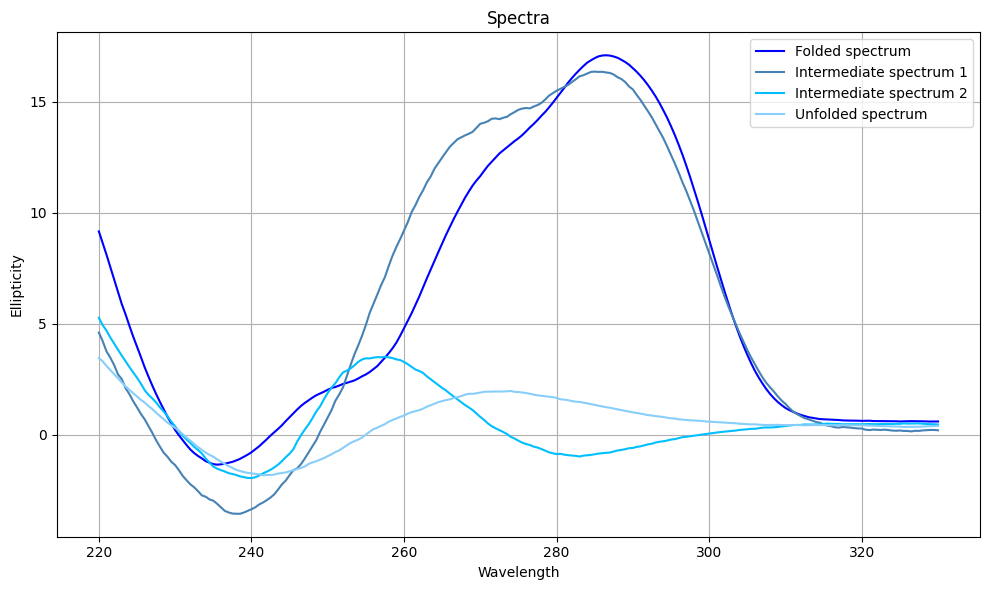

In [55]:
s_f = parametri_dict['C11']*U_prime.iloc[:, 0] + parametri_dict['C21']*U_prime.iloc[:, 1] + parametri_dict['C31']*U_prime.iloc[:, 2] + parametri_dict['C41']*U_prime.iloc[:, 3]
s_i1 = parametri_dict['C12']*U_prime.iloc[:, 0] + parametri_dict['C22']*U_prime.iloc[:, 1] + parametri_dict['C32']*U_prime.iloc[:, 2] + parametri_dict['C42']*U_prime.iloc[:, 3]
s_i2 = parametri_dict['C13']*U_prime.iloc[:, 0] + parametri_dict['C23']*U_prime.iloc[:, 1] + parametri_dict['C33']*U_prime.iloc[:, 2] + parametri_dict['C43']*U_prime.iloc[:, 3]
s_u = parametri_dict['C14']*U_prime.iloc[:, 0] + parametri_dict['C24']*U_prime.iloc[:, 1] + parametri_dict['C34']*U_prime.iloc[:, 2] + parametri_dict['C44']*U_prime.iloc[:, 3]

# Creo un array con le lunghezze d'onda da mettere sulle x
#  Al fine di rendere anche grafico successivo sensato fisicamente è necessario inserire sull'asse delle x le T
# e quindi caricare i dati di temperatura
matr = pd.read_csv('matrice_con_t.dat', sep=',', header=None)
t_array = matr.iloc[0, 1:].astype(float).values # prima riga, salto il primo elemento
l_array = matr.iloc[1:, 0].str.replace(',', '.').astype(float).values


plt.figure(figsize=(10, 6))
plt.plot(l_array, s_f, label='Folded spectrum', color='blue')
plt.plot(l_array, s_i1, label='Intermediate spectrum 1', color='steelblue')
plt.plot(l_array, s_i2, label='Intermediate spectrum 2', color='deepskyblue')
plt.plot(l_array, s_u, label='Unfolded spectrum', color='lightskyblue')

plt.title('Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Ellipticity')
plt.legend()
plt.grid()
plt.tight_layout() 
plt.show()

## Andamenti in funzione della temperatura:

### Popolazione degli stati:

Questa sezione, invece, si concentrerà nello studiare gli andamenti in funzione della temperatura: 

La prima cosa che verrà studiata è M: una matrice di dimensioni (4xlen_T). Questa racchiude informazioni fisiche estremamente interessanti, infatti plottando le 4 componenti di M lungo la temperatura scopriremo le popolazioni corrispettivamente dei 4 stati analizzati: 
folded,
intermediate1,
intermediate2 e
unfolded,
in funzione di T.

Cioè: $M_1 = pop(T)_F$, $M_2 = pop(T)_{I1}$, $M_3 = pop(T)_{I2}$ e $M_4 = pop(T)_U$.

In [56]:
# Carico matrice M
M = pd.read_csv('M_matrix.csv', sep='\t', header=None)
M.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,9.688027e-01,9.587315e-01,9.505010e-01,9.408556e-01,9.296057e-01,9.165475e-01,9.014630e-01,0.884119,0.864263,0.841620,...,0.003548,0.002041,0.001160,0.000653,0.000366,0.000204,0.000113,0.000063,0.000035,0.000019
1,3.117296e-02,4.121060e-02,4.939693e-02,5.896623e-02,7.008611e-02,8.292434e-02,9.764066e-02,0.114375,0.133231,0.154254,...,0.017884,0.011728,0.007590,0.004861,0.003088,0.001950,0.001227,0.000770,0.000483,0.000303
2,2.431919e-05,5.788422e-05,1.020093e-04,1.781122e-04,3.080912e-04,5.278810e-04,8.957433e-04,0.001505,0.002503,0.004118,...,0.399570,0.342055,0.288119,0.239441,0.196825,0.160405,0.129864,0.104627,0.084007,0.067300
3,1.458280e-09,6.188796e-09,1.593325e-08,4.043673e-08,1.011630e-07,2.494734e-07,6.063792e-07,0.000001,0.000003,0.000008,...,0.578998,0.644176,0.703131,0.755045,0.799722,0.837441,0.868796,0.894539,0.915475,0.932377


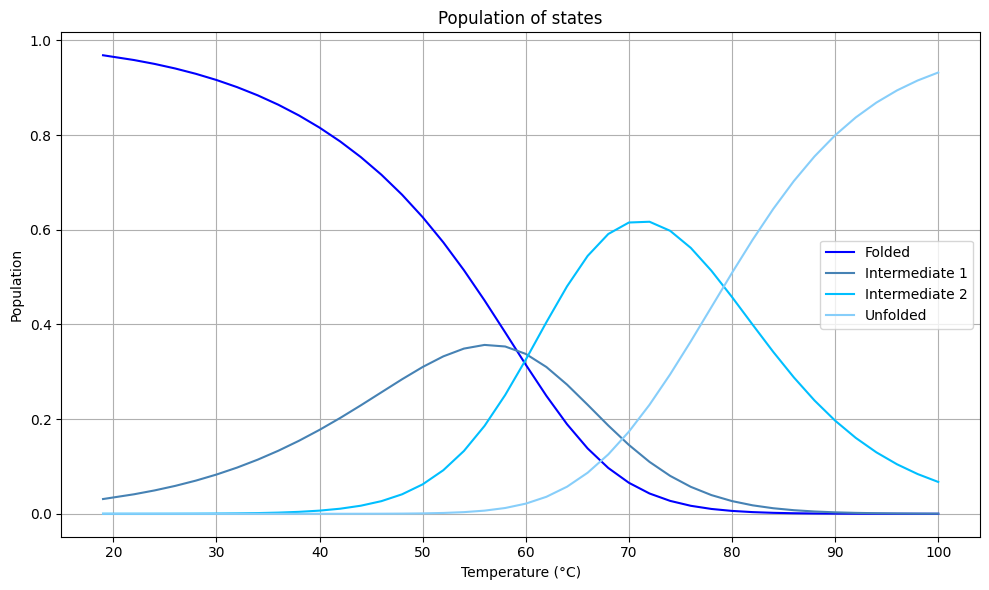

In [57]:
M_1 = M.iloc[0,:].values
M_2 = M.iloc[1,:].values
M_3 = M.iloc[2,:].values
M_4 = M.iloc[3,:].values

plt.figure(figsize=(10, 6))
plt.plot(t_array, M_1, label='Folded', color='blue')
plt.plot(t_array, M_2, label='Intermediate 1', color='steelblue')
plt.plot(t_array, M_3, label='Intermediate 2', color='deepskyblue')
plt.plot(t_array, M_4, label='Unfolded', color='lightskyblue')

plt.title('Population of states')
plt.xlabel('Temperature (°C)')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Andamento spettri in funzione della T:

Per trattare questa ultima parte è necessario fare delle considerazioni: 
1) Al fine di trattare i vari spettri in funzione della temperatura si è usato: 'ipywidgets';
2) Per confrontare i risultati si sono utilizzati due metodi che teoricamente dovrebbero fornire lo stesso risultato, ovvero l'andamento degli spettri alle varie temperature:
    - Ricostruzione 1: $Spettro_{F,I1,I2,U}(\lambda) \times M(T)$
    - Ricostruzione 2: $ U'(\lambda) \times f(T) $

Con $f_i(T) = \sum_{j=1}^{4} C_{ij} \cdot M_j(T)$

**RICOSTRUZIONE 1**


In [ ]:
import ipywidgets as widgets
import numpy as np

# Recupera parametri
Tm1 = parametri_dict['Tm1']
Tm2 = parametri_dict['Tm2']
Tm3 = parametri_dict['Tm3']
dH1 = parametri_dict['dH1']
dH2 = parametri_dict['dH2']
dH3 = parametri_dict['dH3']
R = 1.987

# Funzione per calcolare M_i a singola temperatura
def calc_M_i_single(T):
    A = np.exp(-dH1 / R * (1/Tm1 - 1/T))
    B = np.exp(-dH2 / R * (1/Tm2 - 1/T))
    C = np.exp(-dH3 / R * (1/Tm3 - 1/T))
    denom = 1 + A + A*B + A*B*C
    M1 = 1 / denom
    M2 = A / denom
    M3 = A*B / denom
    M4 = A*B*C/ denom
    return M1, M2, M3, M4

@widgets.interact(idx=widgets.IntSlider(min=0, max=len(t_array)-1, step=1, value=0))
def plot_spettro_interattivo1(idx):
    T = t_array[idx] +273.15  # Converti in Kelvin
    M1, M2, M3, M4 = calc_M_i_single(T)

    spettro1 = M1 * s_f + M2 * s_i1 + M3 * s_i2 + M4*s_u

    plt.figure(figsize=(10, 5))
    plt.plot(l_array, spettro1, label=f"T = {t_array[idx]:.1f} °C", color='royalblue')
    plt.xlabel("Lunghezza d’onda (nm)")
    plt.ylabel("Ellitticità")
    plt.title("Spettro simulato in funzione della temperatura")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



interactive(children=(IntSlider(value=0, description='idx', max=40), Output()), _dom_classes=('widget-interact…

**RICOSTRUZIONE 2**

In [59]:
@widgets.interact(idx=widgets.IntSlider(min=0, max=len(t_array)-1, step=1, value=0))
def plot_spettro_interattivo2(idx):
    T = t_array[idx] + 273.15  # Kelvin
    M1, M2, M3, M4 = calc_M_i_single(T)
    M_vec = np.array([M1, M2, M3, M4])  # shape (4,)

    # Costruzione C
    C = np.array([
        [parametri_dict['C11'], parametri_dict['C12'], parametri_dict['C13'], parametri_dict['C14']],
        [parametri_dict['C21'], parametri_dict['C22'], parametri_dict['C23'], parametri_dict['C24']],
        [parametri_dict['C31'], parametri_dict['C32'], parametri_dict['C33'], parametri_dict['C34']],
        [parametri_dict['C41'], parametri_dict['C42'], parametri_dict['C43'], parametri_dict['C44']]
    ])

    f_T = C @ M_vec  # shape (4,)

    # spettro simulato = combinazione lineare delle componenti SVD (U') con f_T
    spettro2 = U_prime @ f_T  # shape: (n_lambda,)

    plt.figure(figsize=(10, 5))
    plt.plot(l_array, spettro2, label=f"T = {t_array[idx]:.1f} °C", color='sandybrown')
    plt.xlabel("Lunghezza d’onda (nm)")
    plt.ylabel("Ellitticità")
    plt.title("Ricostruzione spettro simulato in funzione della temperatura")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive(children=(IntSlider(value=0, description='idx', max=40), Output()), _dom_classes=('widget-interact…

plottiamoli insieme:

In [ ]:
# Funzione per calcolare spettro 1
def plot_spettro1(T):
    M1, M2, M3, M4 = calc_M_i_single(T)
    spettro1 = M1 * s_f + M2 * s_i1 + M3 * s_i2 + M4 * s_u
    return spettro1

# Funzione per calcolare spettro 2
def plot_spettro2(T):
    M1, M2, M3, M4 = calc_M_i_single(T)
    M_vec = np.array([M1, M2, M3, M4])  # shape (4,)

    # Costruzione C
    C = np.array([
        [parametri_dict['C11'], parametri_dict['C12'], parametri_dict['C13'], parametri_dict['C14']],
        [parametri_dict['C21'], parametri_dict['C22'], parametri_dict['C23'], parametri_dict['C24']],
        [parametri_dict['C31'], parametri_dict['C32'], parametri_dict['C33'], parametri_dict['C34']],
        [parametri_dict['C41'], parametri_dict['C42'], parametri_dict['C43'], parametri_dict['C44']]
    ])

    f_T = C @ M_vec  # shape (3,)
    
    # spettro simulato = combinazione lineare delle componenti SVD (U') con f_T
    spettro2 = U_prime @ f_T  # shape: (n_lambda,) → perfetta per plot con l_array

    return spettro2

@widgets.interact(idx=widgets.IntSlider(min=0, max=len(t_array)-1, step=1, value=0))
def plot_spettro_combinato(idx):
    T = t_array[idx] + 273.15  # Converti in Kelvin

    # Spettro 1
    spettro1 = plot_spettro1(T)
    
    # Spettro 2
    spettro2 = plot_spettro2(T)

    # Creazione del grafico
    plt.figure(figsize=(10, 6))

    # Plot spettro1
    plt.plot(l_array, spettro1, label=f"Spettro 1 (T = {t_array[idx]:.1f} °C)", color='royalblue')

    # Plot spettro2
    plt.plot(l_array, spettro2, label=f"Spettro 2 (T = {t_array[idx]:.1f} °C)", color='sandybrown')

    plt.xlabel("Lunghezza d’onda (nm)")
    plt.ylabel("Ellitticità")
    plt.title("Confronto tra due spettri simulati in funzione della temperatura")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive(children=(IntSlider(value=0, description='idx', max=40), Output()), _dom_classes=('widget-interact…

Ora al fine di verificare quanto la ricostruzione spettrale si discosti dallo spettro vero, si è deciso di plottare i due sullo stesso grafico e far stampare, inoltre, gli errori.

In questo caso preciso si è deciso di utilizzare sia il MAE che l'MSE, per avere un quadro più completo.
Dare uno sguardo a questi scarti ci permette, infatti, di quantificare la bontà del modello ricostruito.

**MAE (Mean Absolute Error)**:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$
Questo è lo scarto medio, estremamente intuitivo che ci dà una stima di quanto il modello è errato in media.


**MSE (Mean Standard Error)**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$
Questo errore anche se meno intuitivo fa sì che gli errori più grandi (quindi quei valori che si discostano di più dal modello) siano di più penalizzati. 


Un riscontro tra i due ci può fornire anche la quantità di errori gravi che il modello (spettro ricostruito) compie.

In [61]:
dati_puliti = pd.read_csv('dati_puliti.csv', sep='\t', header=None)
dati_puliti.head() # Stampo l'head per sicurezza

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.535653,0.549668,0.547439,0.581914,0.563364,0.612426,0.496127,0.604874,0.598425,0.509833,...,0.439534,0.435262,0.497140,0.479955,0.403012,0.441934,0.370971,0.431813,0.367093,0.432024
1,0.521705,0.556836,0.538156,0.581846,0.577134,0.607350,0.504032,0.585079,0.595223,0.509878,...,0.473242,0.441320,0.474463,0.492177,0.403835,0.436586,0.383931,0.423019,0.348449,0.425564
2,0.531593,0.573395,0.517939,0.584496,0.570374,0.611856,0.501482,0.571400,0.591140,0.521280,...,0.463936,0.429568,0.478443,0.473265,0.405304,0.436242,0.364719,0.410306,0.356284,0.414526
3,0.539488,0.584016,0.546564,0.594529,0.561401,0.623771,0.517139,0.549172,0.574798,0.541743,...,0.467257,0.436169,0.477730,0.475877,0.389666,0.418678,0.353156,0.410643,0.332987,0.394576
4,0.528820,0.608973,0.553635,0.608059,0.540713,0.627271,0.533439,0.553204,0.591127,0.535406,...,0.445359,0.445292,0.457624,0.499279,0.375435,0.408440,0.360081,0.405945,0.317857,0.382177


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

@widgets.interact(idx=widgets.IntSlider(min=0, max=len(t_array)-1, step=1, value=0))
def plot_confronto_spettri(idx):
    T = t_array[idx] + 273.15  # Kelvin

    # Calcolo spettro simulato
    spettro_ricostruito = plot_spettro1(T)  # output: array (n_lambda,)

    # Estrai spettro reale corrispondente
    spettro_reale = dati_puliti.iloc[:, idx].values  # Assumi colonne = spettri a varie T

    # Calcolo scarti
    mae = mean_absolute_error(spettro_reale, spettro_ricostruito)
    mse = mean_squared_error(spettro_reale, spettro_ricostruito)

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(l_array, spettro_ricostruito, color='orange', label="Spettro Simulato")
    plt.plot(l_array, spettro_reale, label="Spettro reale", color='blue', linestyle='dashed')
    plt.fill_between(l_array, spettro_ricostruito, spettro_reale, color='gray', alpha=0.3, label=f'Scarto (MAE={mae:.3f}, MSE={mse:.3f})')
    plt.title(f"T = {t_array[idx]:.1f} °C ")
    plt.xlabel("Lunghezza d’onda (nm)")
    plt.ylabel("Ellitticità")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=0, description='idx', max=40), Output()), _dom_classes=('widget-interact…